In [1]:
import tarfile, shutil
import zipfile
import sys, os, urllib.request, tarfile, glob
import numpy as np
import cv2
import librosa
import librosa.core
import librosa.feature
import librosa.display 
import matplotlib.pyplot as plt
import random
from utils import *
from data_utils import *
from train_utils import *
import os
import pandas as pd
import soundfile as sf 
import tensorflow as tf
print(tf.version.VERSION)

2022-08-29 16:50:52.105854: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


2.4.0


In [2]:
folder_train_bonafide = './data/train/bonafide'
folder_train_spoofed = './data/train/spoof'
folder_eval_bonafide = './data/eval/bonafide'
folder_eval_spoofed = './data/eval/spoof'

./data/train/bonafide/LA_T_8173514.flac


/misc/lu/fast_scratch/patx/fathanab/project_sept2020/ASVAntiSpoofing/utils.py:114: FutureWarning: Pass sr=16000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  clip_pitch_shifted = librosa.effects.pitch_shift(clip, sample_rate, n_steps=num_steps, bins_per_octave=num_bins) # shifted by 4 half steps # maybe [-15,15] avoid 0, bins in [5,24]
/misc/lu/fast_scratch/patx/fathanab/project_sept2020/ASVAntiSpoofing/utils.py:123: FutureWarning: Pass rate=1.1457653268043722 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  clip_time_stretched = librosa.effects.time_stretch(clip, speed_factor)
/misc/lu/fast_scratch/patx/fathanab/project_sept2020/ASVAntiSpoofing/utils.py:147: FutureWarning: Pass order=15 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  A = librosa.core.lpc(clip, order)
/misc/lu/fast_scratch/patx/fathanab/project_sept2020/ASVAntiSpoofin

/misc/lu/fast_scratch/patx/fathanab/project_sept2020/ASVAntiSpoofing/utils.py:399: FutureWarning: Pass y=[-3.0517578e-05 -1.5258789e-04 -3.6621094e-04 ...  3.4790039e-03
  3.7231445e-03  3.9367676e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  audio_duration = librosa.get_duration(clip)


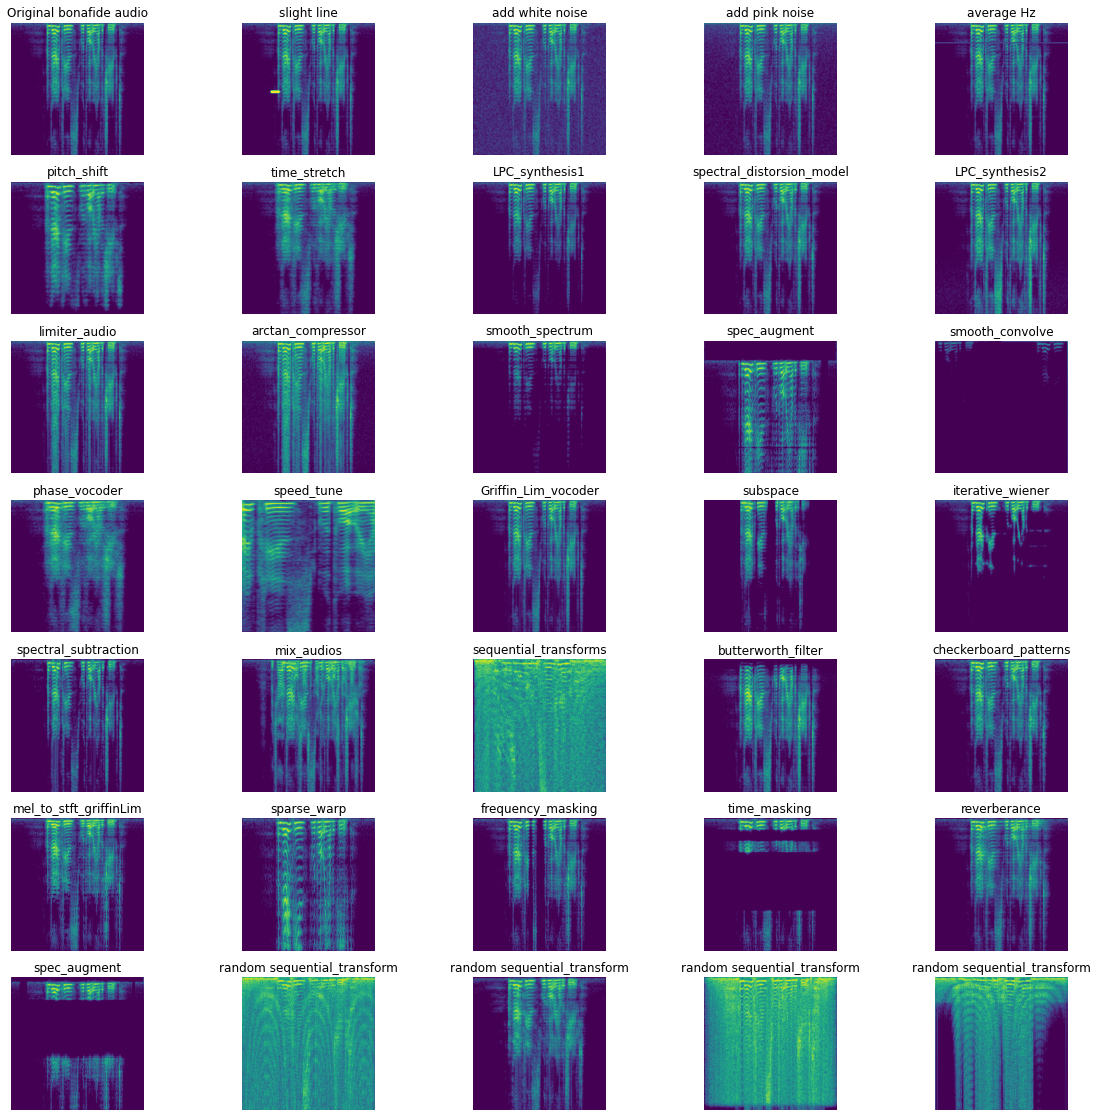

In [3]:
# List of audio augmentations from https://github.com/fathana/spoofAugment
#All augmentations
import os
import soundfile as sf
sample_rate = 16000
downstream_task = True
def resize_spectrogram(x):
    result = cv2.resize(x, (224, 224))
    return result

list_files = []
list_names = []
if downstream_task:

    target = "./data/train/bonafide/LA_T_8173514.flac" #os.path.join(folder_train_bonafide, random.choice(os.listdir(folder_train_bonafide)))
    print(target)

    target = file_load(target)[0]
    list_files.append(target)
    list_names.append("original audio")
    
    img0 = to_img2(target)
    img0 = resize_spectrogram(img0)

    img1 = draw_line(img0)

    img2 = add_whitenoise(target, return_audio=True)
    list_files.append(img2)
    list_names.append("add_whitenoise")
    img2 = to_sp(img2)
    img2 = resize_spectrogram(img2)

    img3 = add_pinknoise(target, return_audio=True)
    list_files.append(img3)
    list_names.append("add_pinknoise")
    img3 = to_sp(img3)
    img3 = resize_spectrogram(img3)

    img4 = average_Hz(img0)
    
    img5 = pitch_shift_audio(target, sample_rate, return_audio=True)
    list_files.append(img5)
    list_names.append("pitch_shift_audio")
    img5 = to_sp(img5)
    img5 = resize_spectrogram(img5)

    img6 = time_stretch_audio(target, return_audio=True)
    list_files.append(img6)
    list_names.append("time_stretch_audio")
    img6 = to_sp(img6)
    img6 = resize_spectrogram(img6)
    
    img7 = LPC_synthesis_audio1(target, sample_rate, return_audio=True)
    list_files.append(img7)
    list_names.append("LPC_synthesis_audio1")
    img7 = to_sp(img7)
    img7 = resize_spectrogram(img7)

    img8 = spectral_distorsion_model_audio(target, return_audio=True)
    list_files.append(img8)
    list_names.append("spectral_distorsion_model_audio")
    img8 = to_sp(img8)
    img8 = resize_spectrogram(img8)
    
    img9 = LPC_synthesis_audio2(target, return_audio=True)
    list_files.append(img9)
    list_names.append("LPC_synthesis_audio2")
    img9 = to_sp(img9)
    img9 = resize_spectrogram(img9)

    img10 = limiter_audio(target, sample_rate, return_audio=True)
    list_files.append(img10)
    list_names.append("limiter_audio")
    img10 = to_sp(img10)
    img10 = resize_spectrogram(img10)
    
    img11 = arctan_compressor_audio(target, sample_rate, return_audio=True)
    list_files.append(img11)
    list_names.append("arctan_compressor_audio")
    img11 = to_sp(img11)
    img11 = resize_spectrogram(img11)

    img12 = smooth_spectrum_audio(target, return_audio=True)
    list_files.append(img12)
    list_names.append("smooth_spectrum_audio")
    img12 = to_sp(img12)
    img12 = resize_spectrogram(img12)
    
    img13 =specAugment(target, sample_rate=sample_rate, type_augment=4, return_audio=True)
    list_files.append(img13)
    list_names.append("specAugment")
    img13 = to_sp(img13)
    img13 = resize_spectrogram(img13)
    
    img14 = smooth_convolve_audio(target, return_audio=True)
    list_files.append(img14)
    list_names.append("smooth_convolve_audio")
    img14 = to_sp(img14)
    img14 = resize_spectrogram(img14)
    
    img15 = phase_vocoder_audio(target, return_audio=True)
    list_files.append(img15)
    list_names.append("phase_vocoder_audio")
    img15 = to_sp(img15)
    img15 = resize_spectrogram(img15)

    img16 = speed_tune_audio(target, sample_rate, return_audio=True)
    list_files.append(img16)
    list_names.append("speed_tune_audio")
    img16 = to_sp(img16)
    img16 = resize_spectrogram(img16)
    
    img17 = Griffin_Lim_vocoder(target, return_audio=True)
    list_files.append(img17)
    list_names.append("Griffin_Lim_vocoder")
    img17 = to_sp(img17)
    img17 = resize_spectrogram(img17)

    img18 = subspace_audio(target, return_audio=True)
    list_files.append(img18)
    list_names.append("subspace_audio")
    img18 = to_sp(img18)
    img18 = resize_spectrogram(img18)
    
    img19 = iterative_wiener_audio(target, return_audio=True)
    list_files.append(img19)
    list_names.append("iterative_wiener_audio")
    img19 = to_sp(img19)
    img19 = resize_spectrogram(img19)

    img20 = spectral_subtraction_audio(target, return_audio=True)
    list_files.append(img20)
    list_names.append("spectral_subtraction_audio")
    img20 = to_sp(img20)
    img20 = resize_spectrogram(img20)
    
    
    target2 = os.path.join(folder_train_bonafide, random.choice(os.listdir(folder_train_bonafide)))
    target2, _ = sf.read(target2)
    img21 = mix_audios(target, target2, return_audio=True)
    list_files.append(img21)
    list_names.append("mix_audios")
    img21 = to_sp(img21)
    img21 = resize_spectrogram(img21)
    
    img22 = apply_sequential_transforms(target, sample_rate, return_audio=True)
    list_files.append(img22)
    list_names.append("apply_sequential_transforms")
    img22 = to_sp(img22)
    img22 = resize_spectrogram(img22)
    
    img23 = butterworth_sound_filter(target, sample_rate, return_audio=True)
    list_files.append(img23)
    list_names.append("butterworth_sound_filter")
    img23 = to_sp(img23)
    img23 = resize_spectrogram(img23)
                             
    img24 = checkerboard_patterns(target, sample_rate, return_audio=True)
    list_files.append(img24)
    list_names.append("checkerboard_patterns")
    img24 = to_sp(img24)
    img24 = resize_spectrogram(img24)
    
    img25 = mel_to_stft_griffinLim(target, sample_rate, return_audio=True)
    list_files.append(img25)
    list_names.append("mel_to_stft_griffinLim")
    img25 = to_sp(img25)
    img25 = resize_spectrogram(img25)
    
    img26 = specAugment(target, sample_rate=sample_rate, type_augment=3, return_audio=True)
    list_files.append(img26)
    list_names.append("sparse_warp")
    img26 = to_sp(img26)
    img26 = resize_spectrogram(img26)
    
    img27 = specAugment(target, sample_rate=sample_rate, type_augment=2, return_audio=True)
    list_files.append(img27)
    list_names.append("frequency_masking")
    img27 = to_sp(img27)
    img27 = resize_spectrogram(img27)
    
    img28 = specAugment(target, sample_rate=sample_rate, type_augment=1, return_audio=True)
    list_files.append(img28)
    list_names.append("time_masking")
    img28 = to_sp(img28)
    img28 = resize_spectrogram(img28)
    
    img29 = reverberance_audio(target, sample_rate=sample_rate, return_audio=True)
    list_files.append(img29)
    list_names.append("reverberance_audio")
    img29 = to_sp(img29)
    img29 = resize_spectrogram(img29)
    
    img30 = specAugment(target, sample_rate=sample_rate, type_augment=4, return_audio=True)
    list_files.append(img30)
    list_names.append("specAugment")
    img30 = to_sp(img30)
    img30 = resize_spectrogram(img30)
    
    img31 = apply_sequential_transforms(target, sample_rate, return_audio=True)
    list_files.append(img31)
    list_names.append("apply_sequential_transforms")
    img31 = to_sp(img31)
    img31 = resize_spectrogram(img31)
    
    img32 = apply_sequential_transforms(target, sample_rate, return_audio=True)
    list_files.append(img32)
    list_names.append("apply_sequential_transforms")
    img32 = to_sp(img32)
    img32 = resize_spectrogram(img32)
    
    img33 = apply_sequential_transforms(target, sample_rate, return_audio=True)
    list_files.append(img33)
    list_names.append("apply_sequential_transforms")
    img33 = to_sp(img33)
    img33 = resize_spectrogram(img33)
    
    img34 = apply_sequential_transforms(target, sample_rate, return_audio=True)
    list_files.append(img34)
    list_names.append("apply_sequential_transforms")
    img34 = to_sp(img34)
    img34 = resize_spectrogram(img34)
    

    plt.figure(figsize=(20,20))
    plt.subplot(7,5,1)
    plt.axis("off")
    plt.title("Original bonafide audio")
    plt.imshow(img0)

    plt.subplot(7,5,2)
    plt.axis("off")
    plt.title("slight line")
    plt.imshow(img1)

    plt.subplot(7,5,3)
    plt.axis("off")
    plt.title("add white noise")
    plt.imshow(img2)

    plt.subplot(7,5,4)
    plt.axis("off")
    plt.title("add pink noise")
    plt.imshow(img3)

    plt.subplot(7,5,5)
    plt.axis("off")
    plt.title("average Hz")
    plt.imshow(img4)
    
    plt.subplot(7,5,6)
    plt.axis("off")
    plt.title("pitch_shift")
    plt.imshow(img5)

    plt.subplot(7,5,7)
    plt.axis("off")
    plt.title("time_stretch")
    plt.imshow(img6)

    plt.subplot(7,5,8)
    plt.axis("off")
    plt.title("LPC_synthesis1")
    plt.imshow(img7)

    plt.subplot(7,5,9)
    plt.axis("off")
    plt.title("spectral_distorsion_model")
    plt.imshow(img8)

    plt.subplot(7,5,10)
    plt.axis("off")
    plt.title("LPC_synthesis2")
    plt.imshow(img9)
    
    plt.subplot(7,5,11)
    plt.axis("off")
    plt.title("limiter_audio")
    plt.imshow(img10)

    plt.subplot(7,5,12)
    plt.axis("off")
    plt.title("arctan_compressor")
    plt.imshow(img11)

    plt.subplot(7,5,13)
    plt.axis("off")
    plt.title("smooth_spectrum")
    plt.imshow(img12)

    plt.subplot(7,5,14)
    plt.axis("off")
    plt.title("spec_augment")
    plt.imshow(img13)

    plt.subplot(7,5,15)
    plt.axis("off")
    plt.title("smooth_convolve")
    plt.imshow(img14)
    
    plt.subplot(7,5,16)
    plt.axis("off")
    plt.title("phase_vocoder")
    plt.imshow(img15)

    plt.subplot(7,5,17)
    plt.axis("off")
    plt.title("speed_tune")
    plt.imshow(img16)

    plt.subplot(7,5,18)
    plt.axis("off")
    plt.title("Griffin_Lim_vocoder")
    plt.imshow(img17)

    plt.subplot(7,5,19)
    plt.axis("off")
    plt.title("subspace")
    plt.imshow(img18)

    plt.subplot(7,5,20)
    plt.axis("off")
    plt.title("iterative_wiener")
    plt.imshow(img19)
    
    plt.subplot(7,5,21)
    plt.axis("off")
    plt.title("spectral_subtraction")
    plt.imshow(img20)

    plt.subplot(7,5,22)
    plt.axis("off")
    plt.title("mix_audios")
    plt.imshow(img21)
    
    plt.subplot(7,5,23)
    plt.axis("off")
    plt.title("sequential_transforms")
    plt.imshow(img22)
    
    plt.subplot(7,5,24)
    plt.axis("off")
    plt.title("butterworth_filter")
    plt.imshow(img23)

    plt.subplot(7,5,25)
    plt.axis("off")
    plt.title("checkerboard_patterns")
    plt.imshow(img24)
    
    plt.subplot(7,5,26)
    plt.axis("off")
    plt.title("mel_to_stft_griffinLim")
    plt.imshow(img25)
    
    plt.subplot(7,5,27)
    plt.axis("off")
    plt.title("sparse_warp")
    plt.imshow(img26)
    
    plt.subplot(7,5,28)
    plt.axis("off")
    plt.title("frequency_masking")
    plt.imshow(img27)
    
    plt.subplot(7,5,29)
    plt.axis("off")
    plt.title("time_masking")
    plt.imshow(img28)
    
    plt.subplot(7,5,30)
    plt.axis("off")
    plt.title("reverberance")
    plt.imshow(img29)
    
    plt.subplot(7,5,31)
    plt.axis("off")
    plt.title("spec_augment")
    plt.imshow(img30)
    
    plt.subplot(7,5,32)
    plt.axis("off")
    plt.title("random sequential_transform")
    plt.imshow(img31)
    
    plt.subplot(7,5,33)
    plt.axis("off")
    plt.title("random sequential_transform")
    plt.imshow(img32)
    
    plt.subplot(7,5,34)
    plt.axis("off")
    plt.title("random sequential_transform")
    plt.imshow(img33)
    
    plt.subplot(7,5,35)
    plt.axis("off")
    plt.title("random sequential_transform")
    plt.imshow(img34)
    
    
    
    #plt.savefig('Spoof_Augmentations_investigation.png')
    #plt.savefig('Spoof_Augmentations_investigation.pdf')
    
    plt.show()

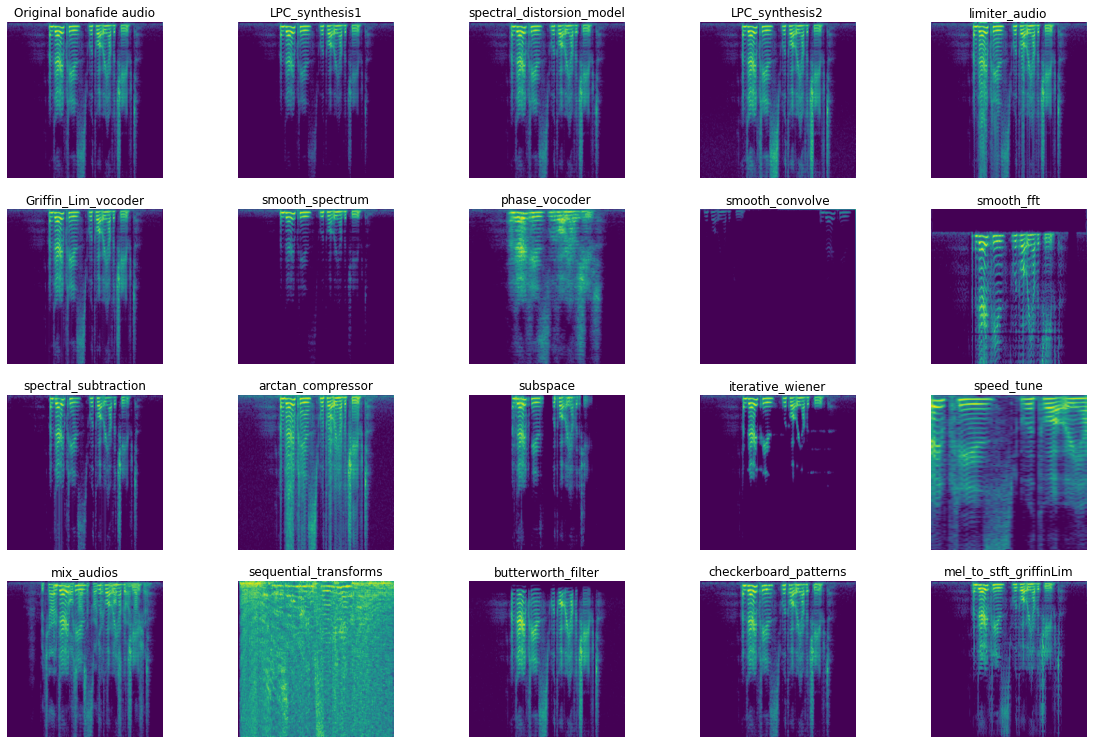

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(6,5,1)
plt.axis("off")
plt.title("Original bonafide audio")
plt.imshow(img0)

plt.subplot(6,5,2)
plt.axis("off")
plt.title("LPC_synthesis1")
plt.imshow(img7)

plt.subplot(6,5,3)
plt.axis("off")
plt.title("spectral_distorsion_model")
plt.imshow(img8)

plt.subplot(6,5,4)
plt.axis("off")
plt.title("LPC_synthesis2")
plt.imshow(img9)

plt.subplot(6,5,5)
plt.axis("off")
plt.title("limiter_audio")
plt.imshow(img10)

plt.subplot(6,5,6)
plt.axis("off")
plt.title("Griffin_Lim_vocoder")
plt.imshow(img17)

plt.subplot(6,5,7)
plt.axis("off")
plt.title("smooth_spectrum")
plt.imshow(img12)

plt.subplot(6,5,8)
plt.axis("off")
plt.title("phase_vocoder")
plt.imshow(img15)

plt.subplot(6,5,9)
plt.axis("off")
plt.title("smooth_convolve")
plt.imshow(img14)

plt.subplot(6,5,10)
plt.axis("off")
plt.title("smooth_fft")
plt.imshow(img13)

plt.subplot(6,5,11)
plt.axis("off")
plt.title("spectral_subtraction")
plt.imshow(img20)

plt.subplot(6,5,12)
plt.axis("off")
plt.title("arctan_compressor")
plt.imshow(img11)

plt.subplot(6,5,13)
plt.axis("off")
plt.title("subspace")
plt.imshow(img18)

plt.subplot(6,5,14)
plt.axis("off")
plt.title("iterative_wiener")
plt.imshow(img19)

plt.subplot(6,5,15)
plt.axis("off")
plt.title("speed_tune")
plt.imshow(img16)

plt.subplot(6,5,16)
plt.axis("off")
plt.title("mix_audios")
plt.imshow(img21)

plt.subplot(6,5,17)
plt.axis("off")
plt.title("sequential_transforms")
plt.imshow(img22)

plt.subplot(6,5,18)
plt.axis("off")
plt.title("butterworth_filter")
plt.imshow(img23)

plt.subplot(6,5,19)
plt.axis("off")
plt.title("checkerboard_patterns")
plt.imshow(img24)

plt.subplot(6,5,20)
plt.axis("off")
plt.title("mel_to_stft_griffinLim")
plt.imshow(img25)

plt.show()

In [5]:
print(len(list_files))

33


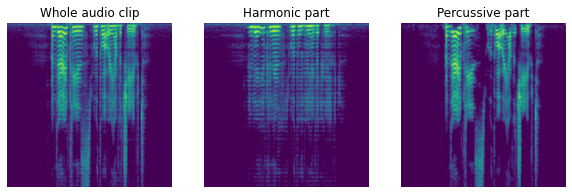

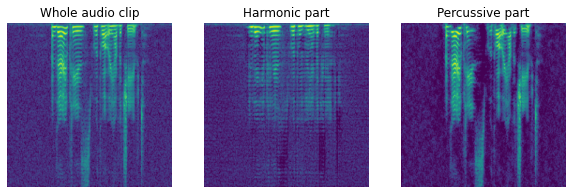

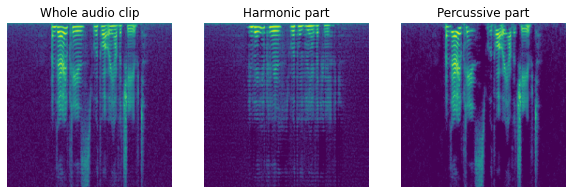

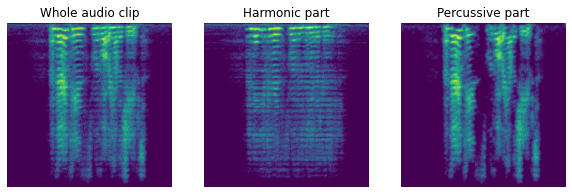

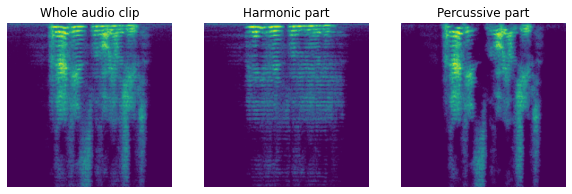

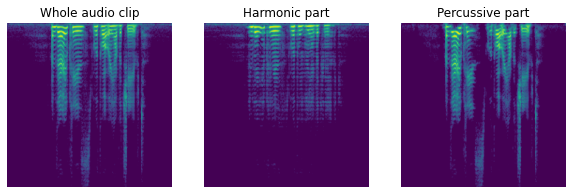

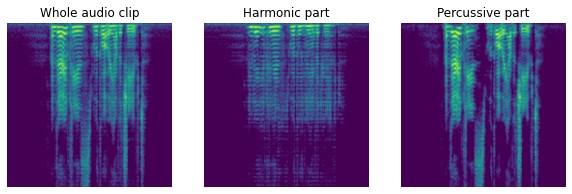

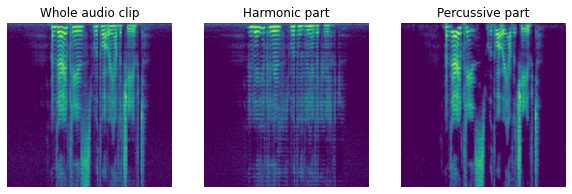

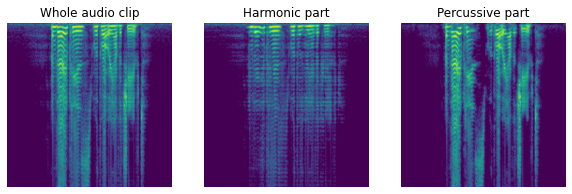

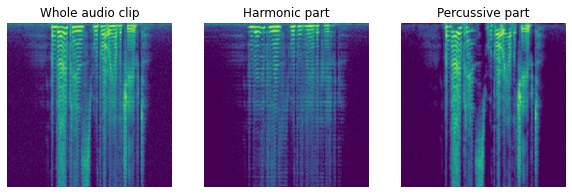

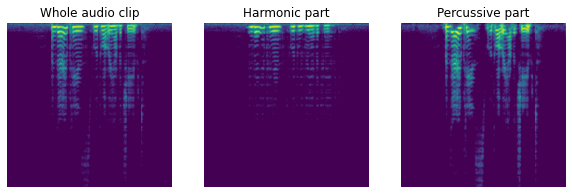

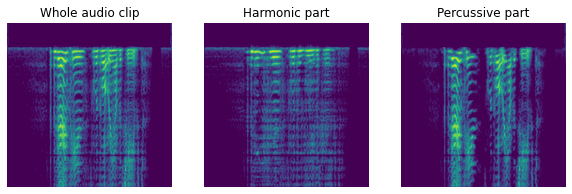

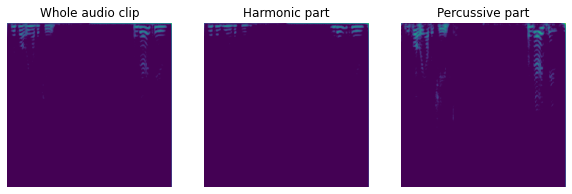

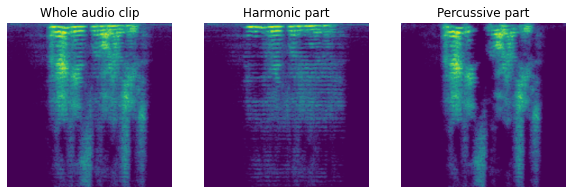

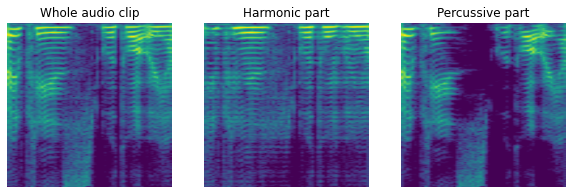

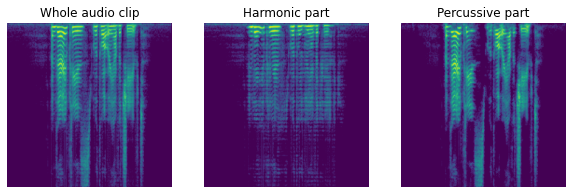

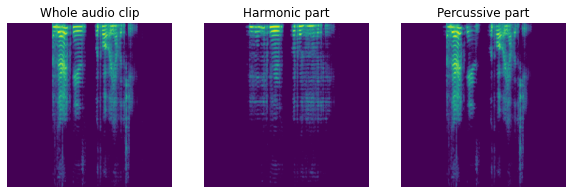

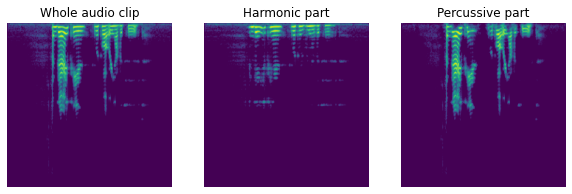

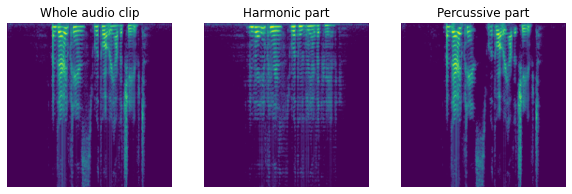

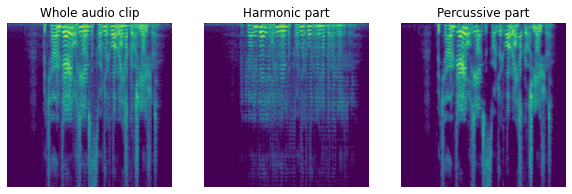

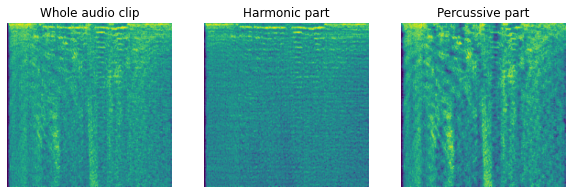

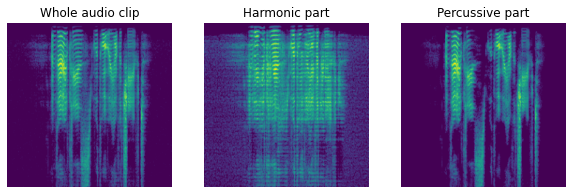

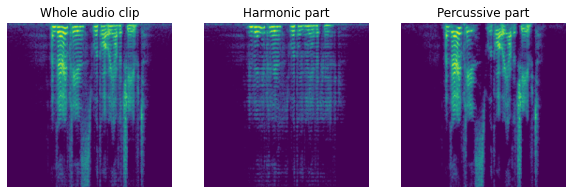

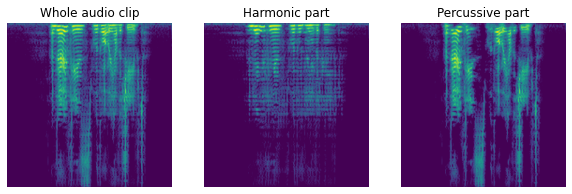

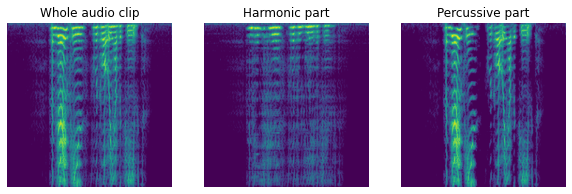

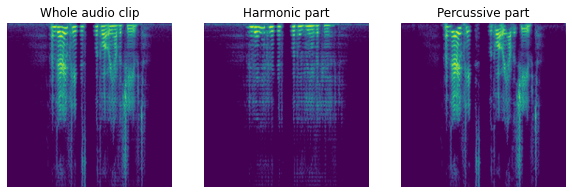

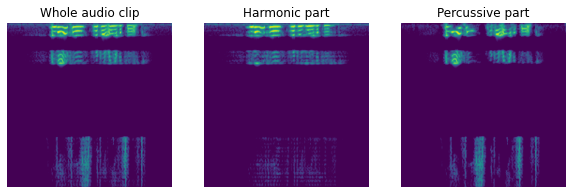

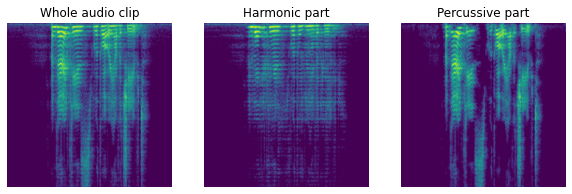

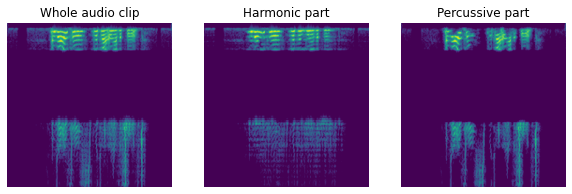

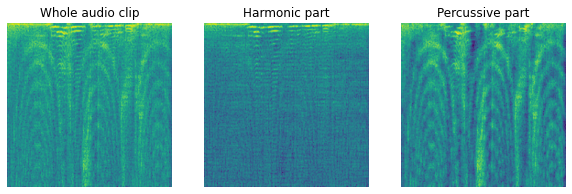

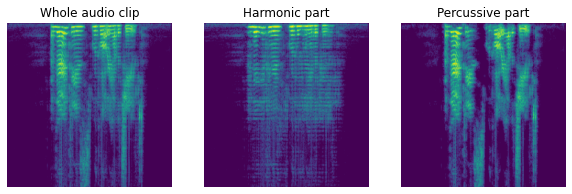

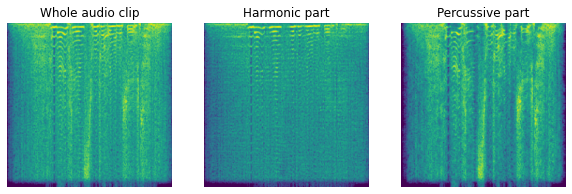

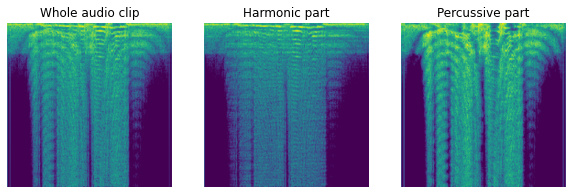

In [6]:
for clip, name in zip(list_files, list_names):
    plt.figure(figsize=(10,10))
    
    clip_harmonic, clip_percussive = librosa.effects.hpss(clip)
    clip = to_sp(clip)
    clip = resize_spectrogram(clip)
    
    clip_harmonic = to_sp(clip_harmonic)
    clip_harmonic = resize_spectrogram(clip_harmonic)
    
    clip_percussive = to_sp(clip_percussive)
    clip_percussive = resize_spectrogram(clip_percussive)
    
    plt.subplot(1,3,1)
    plt.axis("off")
    plt.title("Whole audio clip")
    plt.imshow(clip)

    plt.subplot(1,3,2)
    plt.axis("off")
    plt.title("Harmonic part")
    plt.imshow(clip_harmonic)

    plt.subplot(1,3,3)
    plt.axis("off")
    plt.title("Percussive part")
    plt.imshow(clip_percussive)
    
    #plt.savefig('sp_harmonic_percussive_' + str(name) + '.png')
    #plt.savefig('sp_harmonic_percussive_' + str(name) + '.pdf')

    plt.show()

In [7]:
print(list_names)

['original audio', 'add_whitenoise', 'add_pinknoise', 'pitch_shift_audio', 'time_stretch_audio', 'LPC_synthesis_audio1', 'spectral_distorsion_model_audio', 'LPC_synthesis_audio2', 'limiter_audio', 'arctan_compressor_audio', 'smooth_spectrum_audio', 'specAugment', 'smooth_convolve_audio', 'phase_vocoder_audio', 'speed_tune_audio', 'Griffin_Lim_vocoder', 'subspace_audio', 'iterative_wiener_audio', 'spectral_subtraction_audio', 'mix_audios', 'apply_sequential_transforms', 'butterworth_sound_filter', 'checkerboard_patterns', 'mel_to_stft_griffinLim', 'sparse_warp', 'frequency_masking', 'time_masking', 'reverberance_audio', 'specAugment', 'apply_sequential_transforms', 'apply_sequential_transforms', 'apply_sequential_transforms', 'apply_sequential_transforms']
